# CS167 Day 03 Demonstration Notes

## Part 1: Selecting columns in dataframes

In [ ]:
import pandas
from google.colab import drive
drive.mount('/content/drive')
#go through authentication step

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# what is the data type of titanic?
type(titanic)

pandas.core.frame.DataFrame

In [ ]:
# what are the features (column titles) of the titanic dataset?
titanic.columns

# Find how many columns:
titanic.shape # or
len(titanic.columns)

15

In [ ]:
#display columns
titanic['pclass']
#or
#titanic.pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: pclass, Length: 891, dtype: int64

In [ ]:
#subset multiple columns
subset = titanic [ ['pclass', 'age', 'survived']]
subset

,pclass,age,survived
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0
...,...,...,...
886,2,27.0,0
887,1,19.0,1
888,3,NaN,0
889,1,26.0,1


In [ ]:
#type of a column
type(titanic['pclass'])

pandas.core.series.Series

In [ ]:
#shape (number of elements in each dimension)
titanic.shape
# Columns
titanic.shape[1]
titanic.columns.shape[0]

15

## Part 2: loc vs. iloc

In [ ]:
titanic.loc[886];  ## 886 is really a "name", not a number
titanic.iloc[886];  ## 886 is now a index number using iLoc

subset = titanic.loc[880:885]

subset.loc[880] #works
# subset.iloc[880] #broken.... how would you fix it?
# Fix:
subset.iloc[0]

survived                 1
pclass                   2
sex                 female
age                     25
sibsp                    0
parch                    1
fare                    26
embarked                 S
class               Second
who                  woman
adult_male           False
deck                   NaN
embark_town    Southampton
alive                  yes
alone                False
Name: 880, dtype: object

## Part 3: Subsetting using series

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# can compare the value of an entire series!
titanic['deck'] == 'B'

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: deck, Length: 891, dtype: bool

In [ ]:
# can use this series of Trues and Falses to get a subset of the data
deckB = titanic[ titanic['deck'] == 'B']
#returns a dataframe where only where deck is B
deckB.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
139,0,1,male,24.0,0,0,79.2000,C,First,man,True,B,Cherbourg,no,True


In [ ]:
#combine two series using and (&)
deckBFemale = titanic[ (titanic['deck'] == 'B') & (titanic['sex'] == 'female') ]
deckBFemale.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
194,1,1,female,44.0,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
257,1,1,female,30.0,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True


In [ ]:
# Grab both columns and rows:
deck_b_subset = titanic[(titanic['deck']=='B')&(titanic['sex']=='female')] [['deck', 'sex', 'age', 'survived']]
deck_b_subset

,deck,sex,age,survived
31,B,female,NaN,1
61,B,female,38.0,1
194,B,female,44.0,1
195,B,female,58.0,1
257,B,female,30.0,1
291,B,female,19.0,1
299,B,female,50.0,1
311,B,female,18.0,1
329,B,female,16.0,1
369,B,female,24.0,1


## Part 4: Some handy functions

In [ ]:
#now can use this as a subset
deckB['age'].mean()

34.955555555555556

In [ ]:
# we can use functions like mean(), median(), std(), etc on a dataframe
deckB['age'].median()

33.0

In [ ]:
# Std Dev
deckB['age'].std()

15.491868182952622

In [ ]:
# max
deckB['age'].max()

AttributeError: ignored

In [ ]:
# describe() will print out the count, mean, standard deviation, and give an idea of the distrubtion of the numeric categories
deckB.describe()

,survived,pclass,age,sibsp,parch,fare
count,47.000000,47.0,45.000000,47.000000,47.000000,47.000000
mean,0.744681,1.0,34.955556,0.361702,0.574468,113.505764
std,0.440755,0.0,15.491868,0.568198,0.773043,109.301500
min,0.000000,1.0,11.000000,0.000000,0.000000,0.000000
25%,0.500000,1.0,24.000000,0.000000,0.000000,57.000000
50%,1.000000,1.0,33.000000,0.000000,0.000000,80.000000
75%,1.000000,1.0,44.000000,1.000000,1.000000,120.000000
max,1.000000,1.0,70.000000,2.000000,2.000000,512.329200


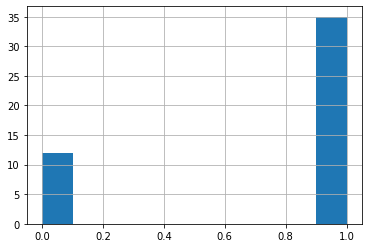

In [ ]:
# The hist() function will display a histogram of the data you pass it.
deckB['survived'].hist()

In [ ]:
#doing arithmetic on groups within the dataframe (Average age based on pclass)
titanic.groupby(['pclass'])['age'].mean()

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [ ]:
#seeing all of the possible values of a column:
titanic['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)